#**Quantium Virtual Internship**


##**Task 1**

**Data preparation and customer analytics**

Conduct analysis on your client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.



---

###**Loading Data and Necessary Libraries**


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [57]:
p_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Quantium Virtual Internship/T1/QVI_purchase_behaviour.csv')
t_data = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Quantium Virtual Internship/T1/QVI_transaction_data.xlsx')

In [58]:
t_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [59]:
p_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


###**Pre Processing Data**

Checking Null Values

In [60]:
t_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [61]:
p_data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

*No records with NULL values present*



---


####**Transaction Data**

In [62]:
t_data.shape

(264836, 8)

In [63]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


We need to change change the variable type for 'DATE' column from int64 to date

In [64]:
def xldate_to_datetime(xldate):
   tempDate = datetime(1900, 1, 1)
   deltaDays =timedelta(days=int(xldate)-2)
   TheTime = (tempDate + deltaDays )
   return TheTime.strftime("%m/%d/%Y")

dates = t_data['DATE']
dates = list(dates)
dates_new=[]

for date in dates:
  dates_new.append(xldate_to_datetime(date))
  
dates_new = np.reshape(np.array(dates_new),(-1,1))

t_data['DATE'] = dates_new

In [65]:
t_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,10/17/2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,05/14/2019,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,05/20/2019,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,08/17/2018,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,08/18/2018,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [66]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  object 
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 16.2+ MB


In [67]:
t_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [68]:
outlier = list((np.where(t_data['PROD_QTY'] == 200.0)))

In [69]:
outlier

[array([69762, 69763])]

In [70]:
outlier = list(outlier[0])

Removing outlier

In [71]:
t_data = t_data.drop(outlier,axis=0)

In [72]:
t_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
std,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


Analysis by Date

In [73]:
len(t_data['DATE'].unique())

364

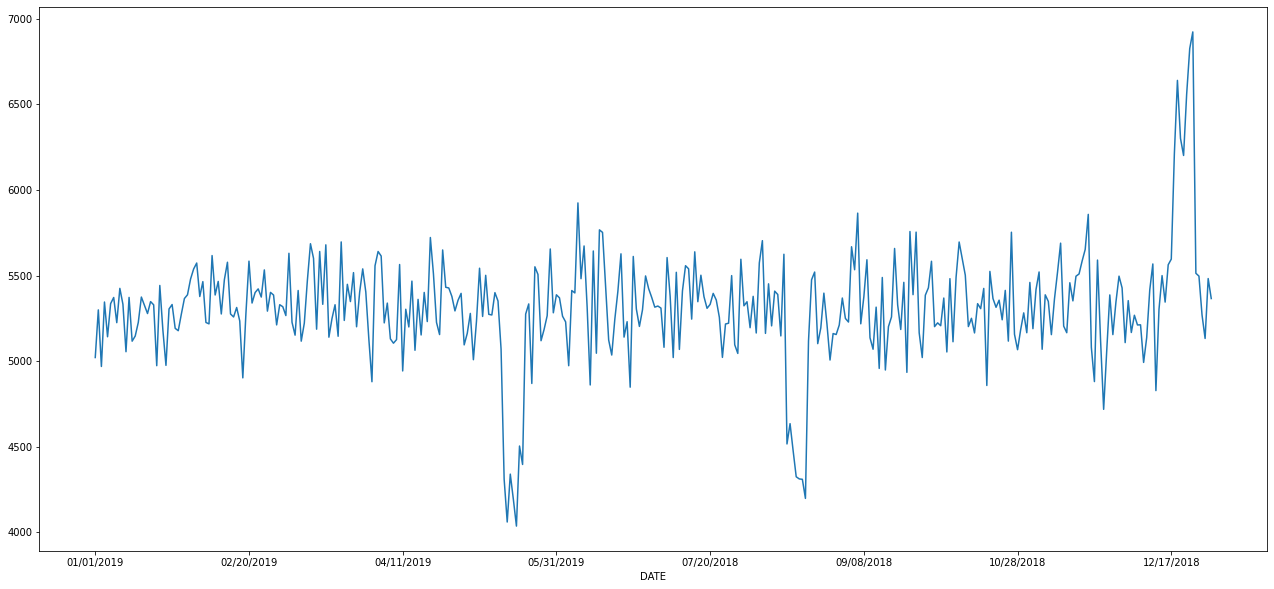

In [74]:
t_data.groupby(['DATE'])['TOT_SALES'].sum().plot(figsize=(22,10))

Analysis by Product Name

In [75]:
t_data['PROD_NAME'].describe() 

count                                     264834
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

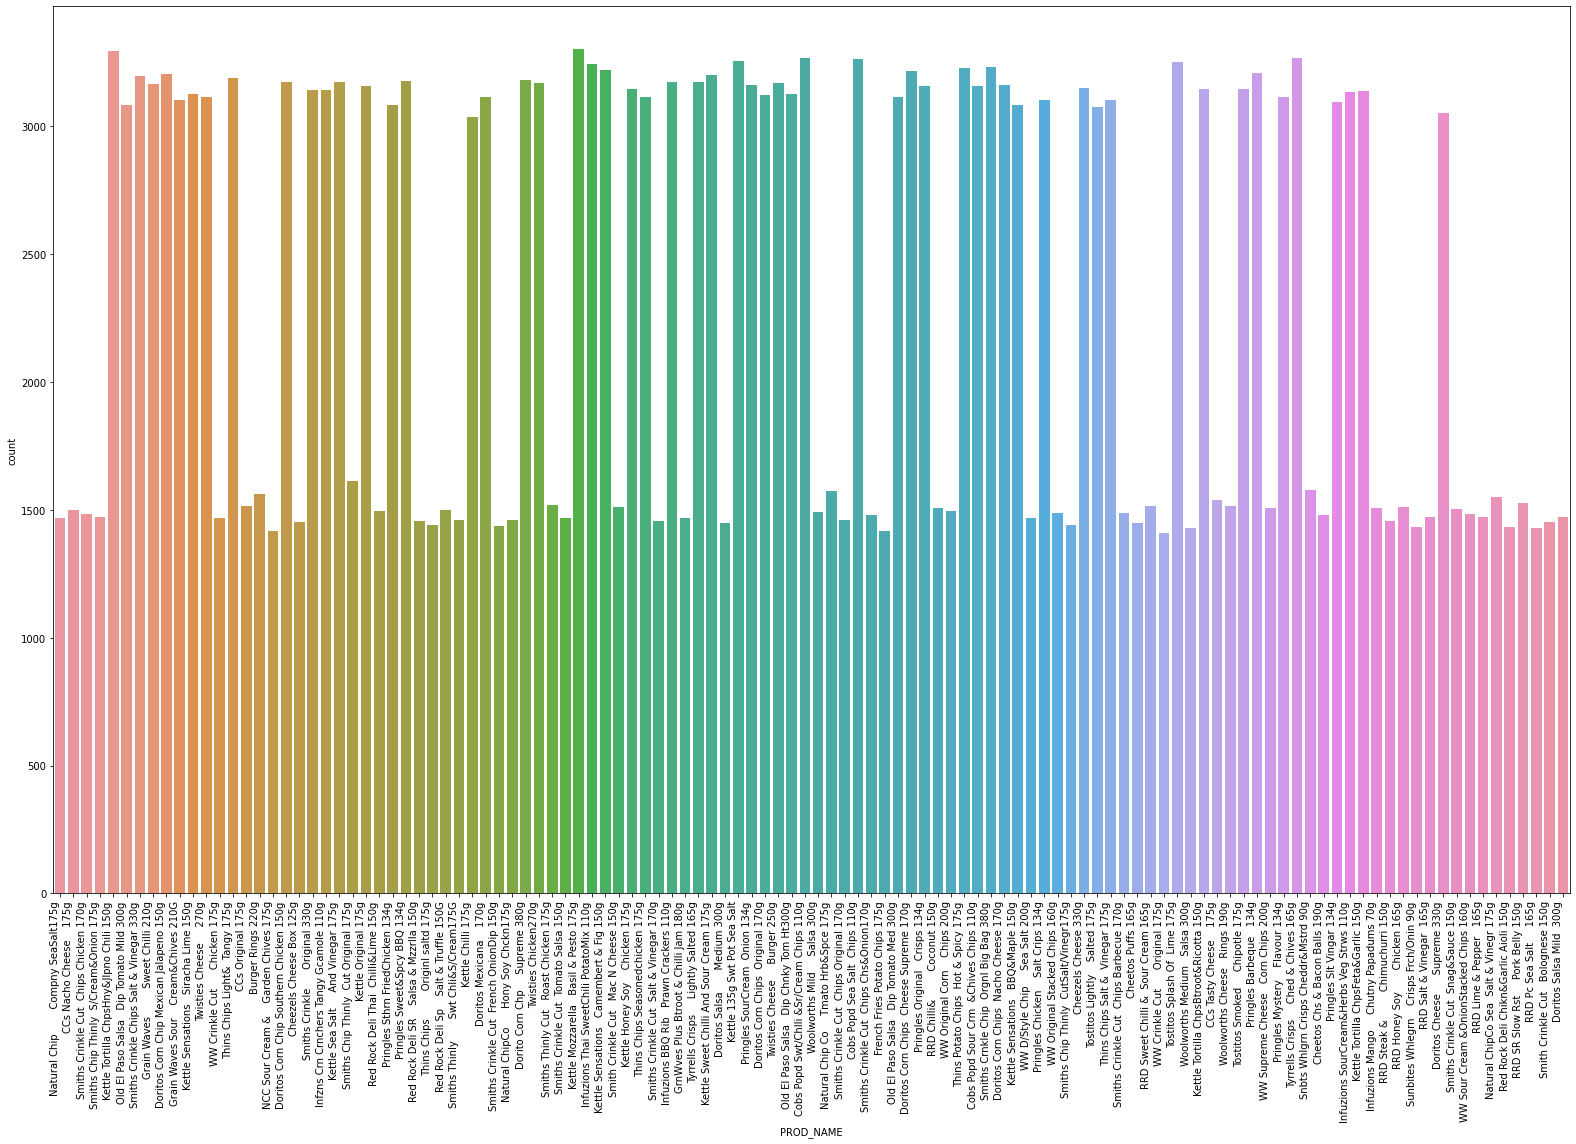

In [76]:
plt.figure(figsize=(22,16))
figure = sns.countplot(t_data['PROD_NAME'],label='Count')

figure.set_xticklabels(figure.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [77]:
t_data['PROD_NAME'].value_counts().sort_values(ascending=False)

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

Highest Count = 3304

Lowest count = 1410

**Adding Packet Size Attribute**

In [78]:
temp = pd.DataFrame(t_data['PROD_NAME'])
temp = np.array(temp)
result = []


for value in temp:
  value = str(value)
  ans = int("".join(filter(str.isdigit, value)))
  result.append(ans)


t_data['PACK_SIZE'] = result

In [79]:
t_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,10/17/2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,05/14/2019,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,05/20/2019,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,08/17/2018,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,08/18/2018,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [80]:
result = set(result)

In [81]:
min_packsize = min(result)
max_packsize = max(result)

In [82]:
min_packsize

70

In [83]:
max_packsize

380

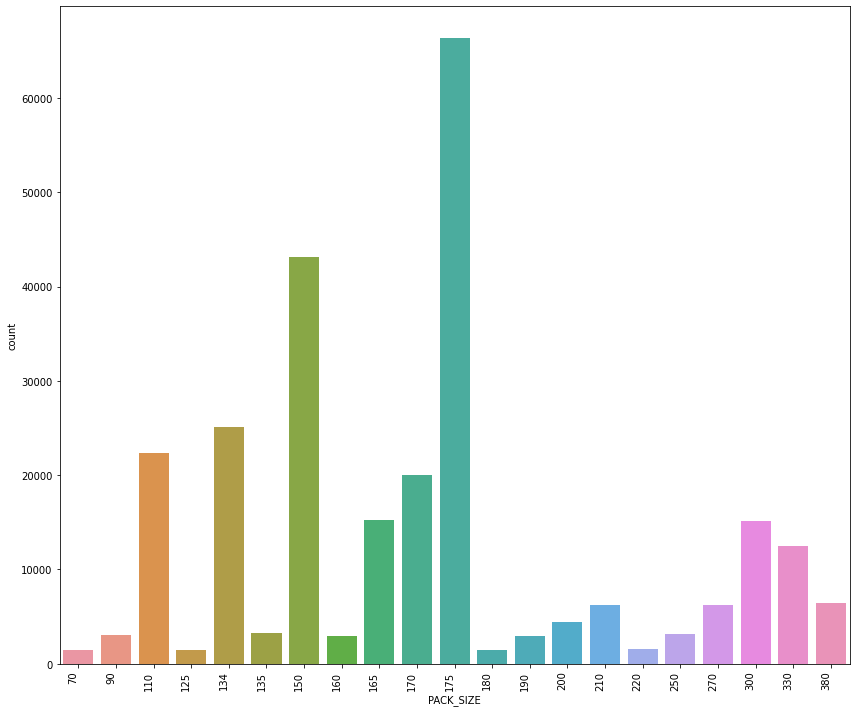

In [84]:
plt.figure(figsize=(12,10))
figure = sns.countplot(t_data['PACK_SIZE'],label='Count')

figure.set_xticklabels(figure.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

Maximum Sales are observed for 175 Pack Size

In [85]:
t_data['BRAND'] = t_data['PROD_NAME'].str.split(' ').str[0]

In [86]:
print('Total Brands in dataset :',len(t_data['BRAND'].unique()))
t_data['BRAND'].describe()

Total Brands in dataset : 29


count     264834
unique        29
top       Kettle
freq       41288
Name: BRAND, dtype: object

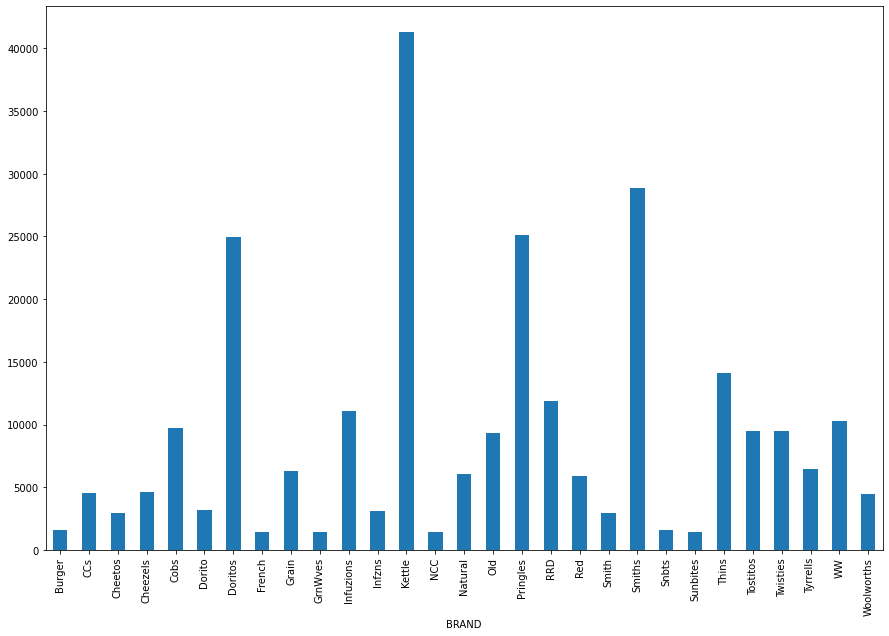

In [87]:
t_data.groupby(t_data['BRAND'])['TOT_SALES'].count().plot(kind='bar',figsize=(15,10))

Date Wise Sales

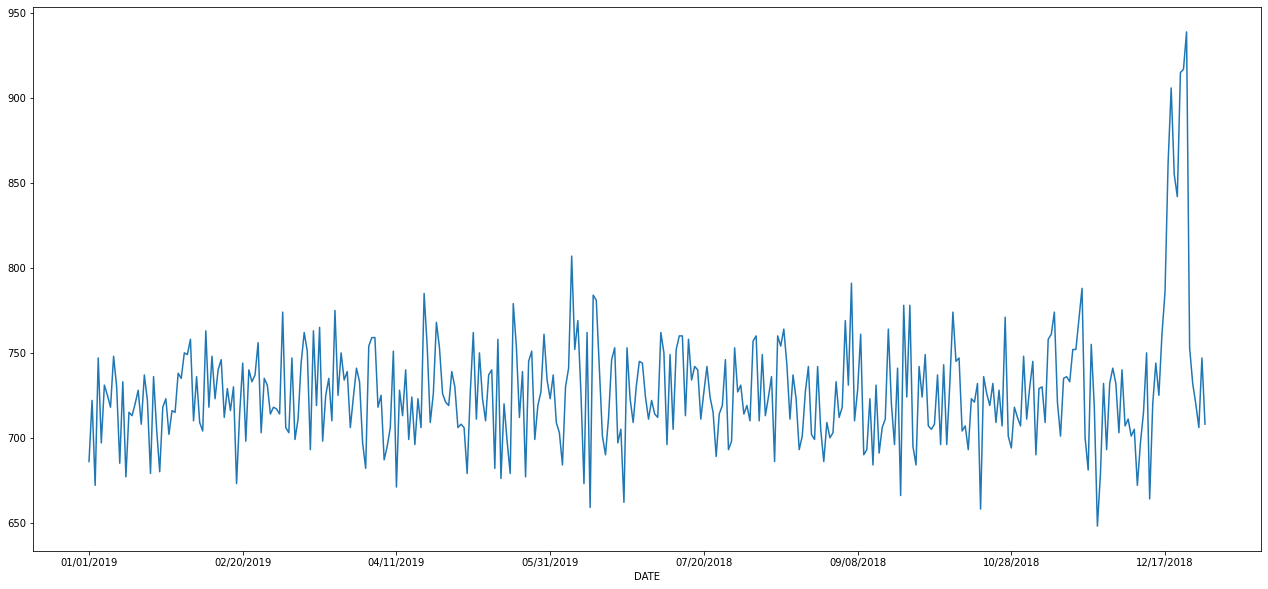

In [88]:
t_data.groupby([t_data['DATE']])['TOT_SALES'].count().plot(figsize=(22,10))

####**Customer Purchase Data**

In [89]:
p_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [90]:
p_data['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [91]:
print("Unique Lifestages : ")

len(p_data['LIFESTAGE'].unique())

Unique Lifestages : 


7

In [92]:
print("Unique Loyalty Card Numbers : ")

len(p_data['LYLTY_CARD_NBR'].unique())

Unique Loyalty Card Numbers : 


72637

In [93]:
print("Unique Loyalty Card Numbers : ")

len(p_data['PREMIUM_CUSTOMER'].unique())

Unique Loyalty Card Numbers : 


3

In [94]:
p_data['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [95]:
p_data['LIFESTAGE'].value_counts().sort_values(ascending=False)

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [96]:
p_data['PREMIUM_CUSTOMER'].value_counts().sort_values(ascending=False)

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [97]:
p_data['LIFESTAGE'].describe

<bound method NDFrame.describe of 0         YOUNG SINGLES/COUPLES
1         YOUNG SINGLES/COUPLES
2                YOUNG FAMILIES
3         OLDER SINGLES/COUPLES
4        MIDAGE SINGLES/COUPLES
                  ...          
72632    MIDAGE SINGLES/COUPLES
72633            YOUNG FAMILIES
72634            YOUNG FAMILIES
72635            OLDER FAMILIES
72636     YOUNG SINGLES/COUPLES
Name: LIFESTAGE, Length: 72637, dtype: object>

In [98]:
p_data['PREMIUM_CUSTOMER'].describe

<bound method NDFrame.describe of 0           Premium
1        Mainstream
2            Budget
3        Mainstream
4        Mainstream
            ...    
72632    Mainstream
72633    Mainstream
72634       Premium
72635        Budget
72636    Mainstream
Name: PREMIUM_CUSTOMER, Length: 72637, dtype: object>

###**Merging Transaction Data and Customer Purchase Data**

In [99]:
data = pd.merge(t_data,p_data,on='LYLTY_CARD_NBR',how='outer',indicator=False)
data.head(20)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,10/17/2018,1.0,1000,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,175.0,Natural,YOUNG SINGLES/COUPLES,Premium
1,05/14/2019,1.0,1307,348.0,66.0,CCs Nacho Cheese 175g,3.0,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,11/10/2018,1.0,1307,346.0,96.0,WW Original Stacked Chips 160g,2.0,3.8,160.0,WW,MIDAGE SINGLES/COUPLES,Budget
3,03/09/2019,1.0,1307,347.0,54.0,CCs Original 175g,1.0,2.1,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
4,05/20/2019,1.0,1343,383.0,61.0,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
5,08/17/2018,2.0,2373,974.0,69.0,Smiths Chip Thinly S/Cream&Onion 175g,5.0,15.0,175.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
6,08/18/2018,2.0,2426,1038.0,108.0,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3.0,13.8,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget
7,05/19/2019,4.0,4074,2982.0,57.0,Old El Paso Salsa Dip Tomato Mild 300g,1.0,5.1,300.0,Old,MIDAGE SINGLES/COUPLES,Budget
8,08/06/2018,4.0,4074,2978.0,70.0,Tyrrells Crisps Lightly Salted 165g,2.0,8.4,165.0,Tyrrells,MIDAGE SINGLES/COUPLES,Budget
9,08/09/2018,4.0,4074,2979.0,60.0,Kettle Tortilla ChpsFeta&Garlic 150g,2.0,9.2,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [100]:
data.isnull().sum()

DATE                1
STORE_NBR           1
LYLTY_CARD_NBR      0
TXN_ID              1
PROD_NBR            1
PROD_NAME           1
PROD_QTY            1
TOT_SALES           1
PACK_SIZE           1
BRAND               1
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Dropping null values

In [101]:
data.dropna(axis=0,inplace=True)

In [102]:
data.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [103]:
data.shape

(264834, 12)

###**Visualization**

Lifestage, Premium Customer Category    v/s    Total Sales

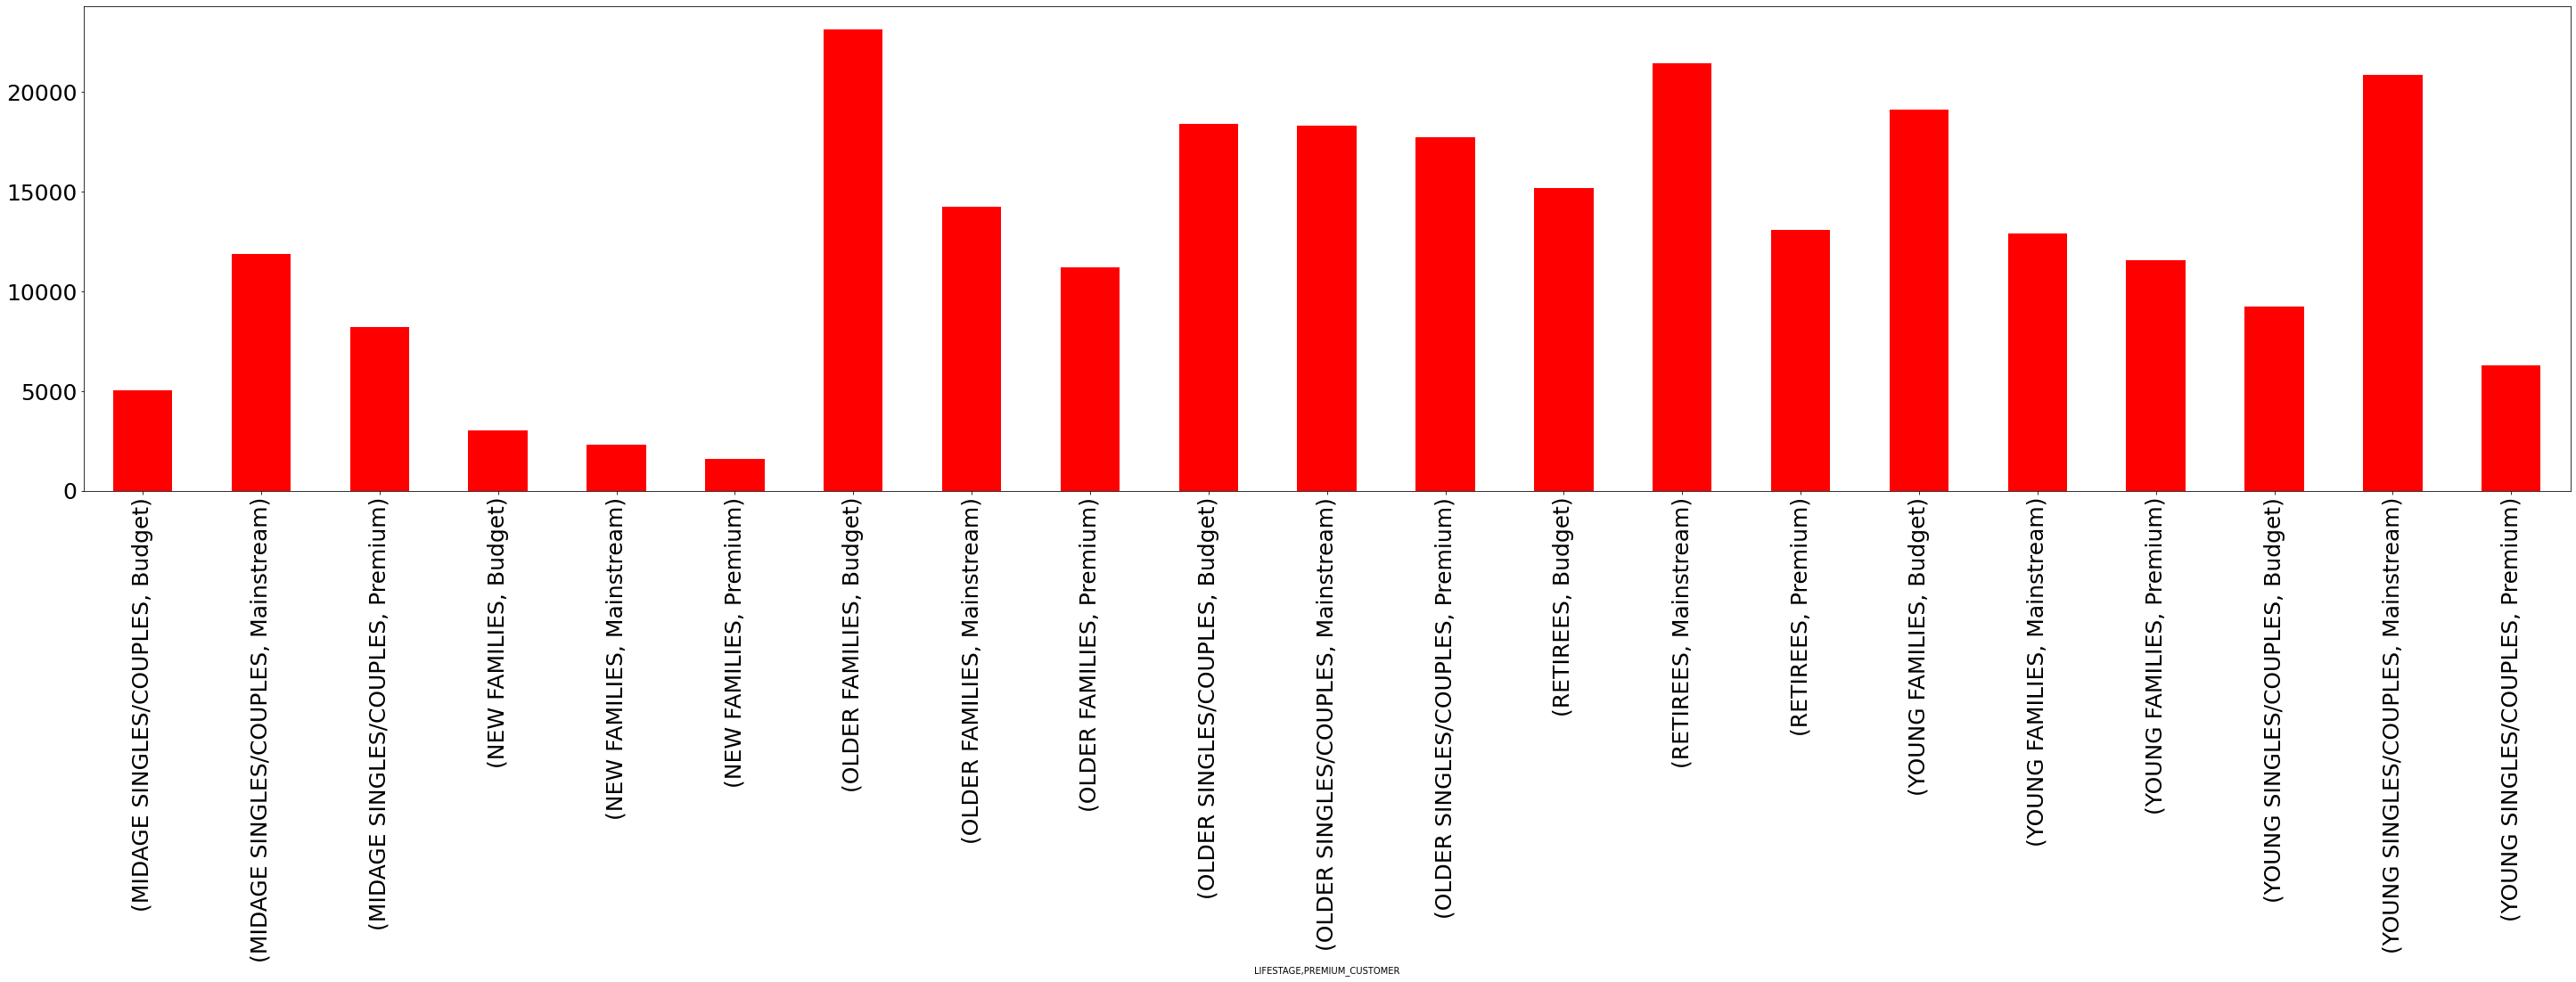

In [104]:
data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].count().plot(figsize=(50,10),kind='bar',color='red',fontsize=25)

Lifestage, Brand v/s Total Sales

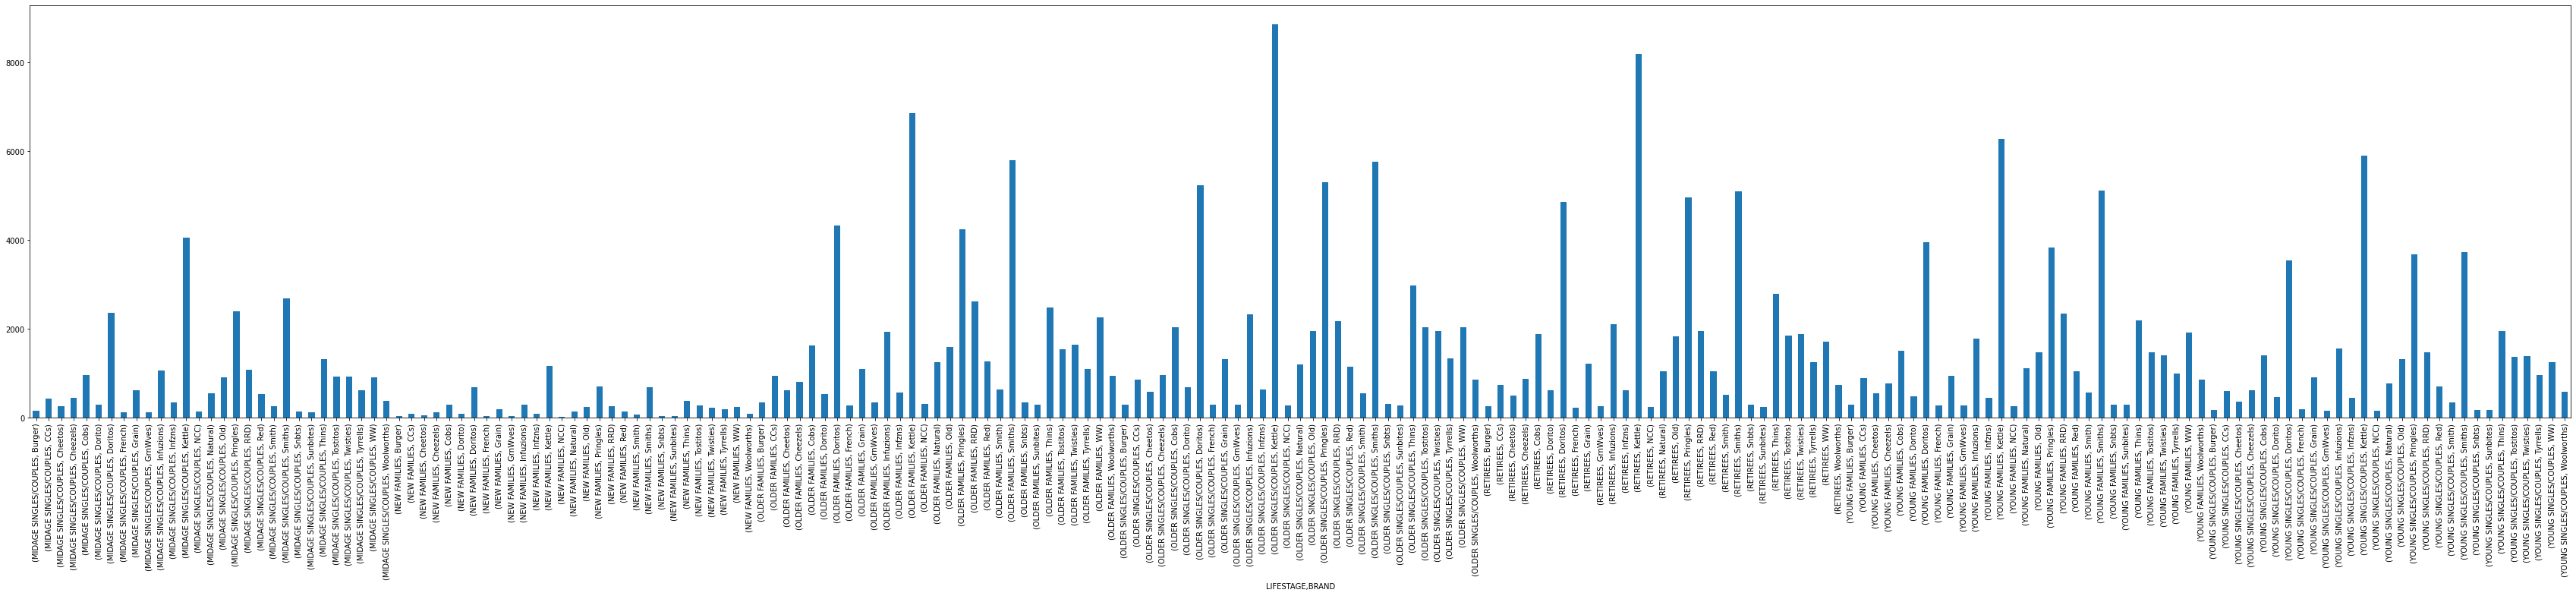

In [105]:
data.groupby(['LIFESTAGE','BRAND'])['TOT_SALES'].count().plot(figsize=(60,10),kind='bar')

Brands v/s Customers

Text(0, 0.5, 'CUSTOMER')

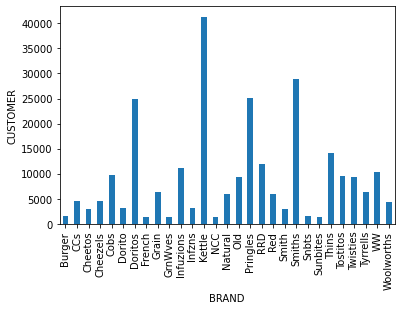

In [106]:
fig = data.groupby(['BRAND'])['PREMIUM_CUSTOMER'].count().plot(kind='bar')
fig.set_ylabel('CUSTOMER')

Premium Customer Category Count

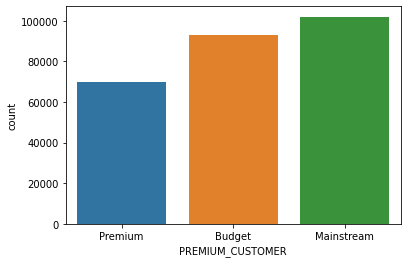

In [107]:
sns.countplot(data['PREMIUM_CUSTOMER'],label="No of customers in each category")

###**Save Data**

In [108]:
temp = pd.DataFrame()
temp['TOT_SALES'] = data['TOT_SALES']
temp['PREMIUM_CUSTOMER'] = data['PREMIUM_CUSTOMER']
temp['LIFESTAGE'] = data['LIFESTAGE']
temp.columns
temp.shape
temp.head()

,TOT_SALES,PREMIUM_CUSTOMER,LIFESTAGE
0,6.0,Premium,YOUNG SINGLES/COUPLES
1,6.3,Budget,MIDAGE SINGLES/COUPLES
2,3.8,Budget,MIDAGE SINGLES/COUPLES
3,2.1,Budget,MIDAGE SINGLES/COUPLES
4,2.9,Budget,MIDAGE SINGLES/COUPLES


In [110]:
data.to_csv('dataset_lat.csv',index=False)
#temp[['PREMIUM_CUSTOMER','TOT_SALES']].plot(x="LIFESTAGE",kind='bar')

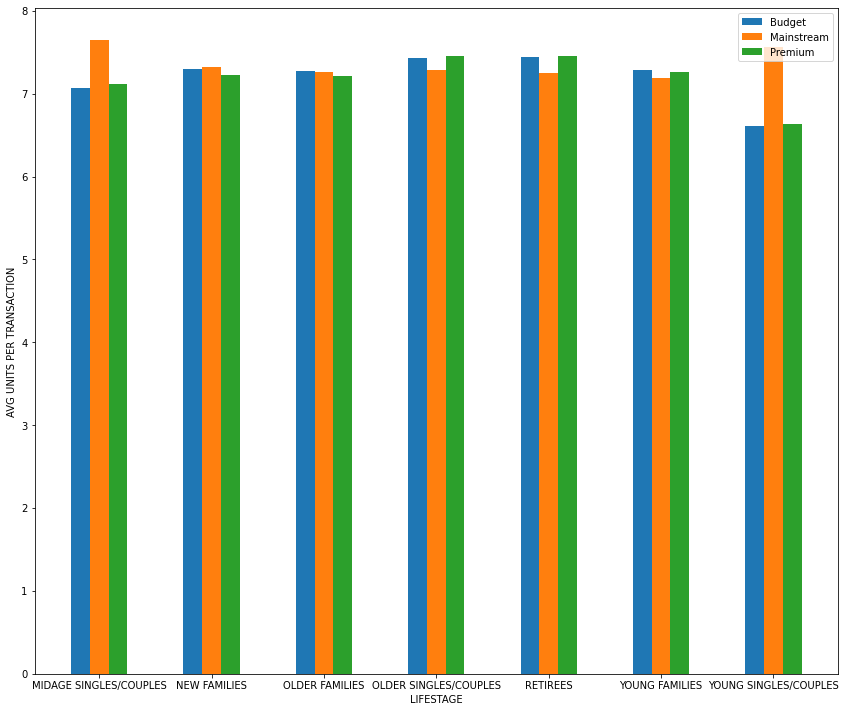

In [112]:
temp.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].mean().unstack().plot(kind='bar',figsize=(12,10))
plt.xticks(rotation=0)
plt.ylabel("AVG UNITS PER TRANSACTION")
plt.autoscale(True)
plt.legend()
plt.tight_layout()
plt.show()

PREMIUM_CUSTOMER        Budget  Mainstream  Premium
LIFESTAGE                                          
MIDAGE SINGLES/COUPLES    5020       11874     8216
NEW FAMILIES              3005        2325     1589
OLDER FAMILIES           23160       14244    11190
OLDER SINGLES/COUPLES    18407       18318    17754
RETIREES                 15201       21466    13096
YOUNG FAMILIES           19122       12907    11563
YOUNG SINGLES/COUPLES     9242       20854     6281


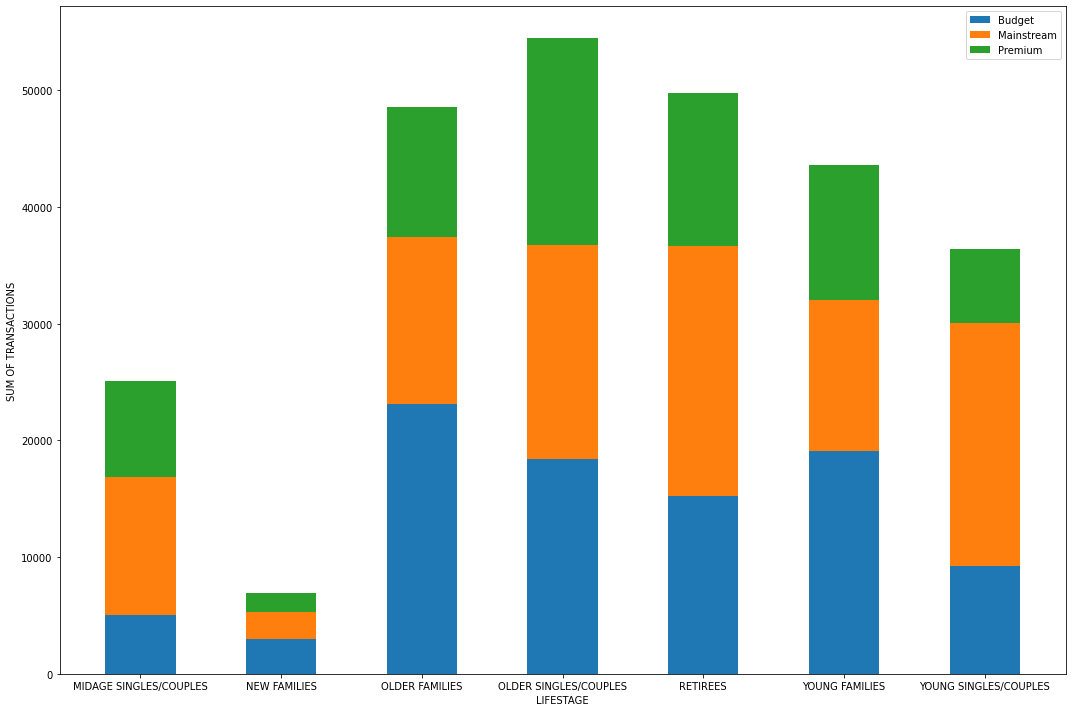

In [113]:
df = temp.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).size().unstack()
print(df)
df.plot(kind='bar',stacked=True,figsize=(15,10))
plt.xticks(rotation=0)
plt.ylabel("SUM OF TRANSACTIONS")
plt.autoscale(True)
plt.legend()
plt.tight_layout()
plt.show()